In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
# Load dataset
from pandas import read_csv
dataset = 'Amylose.csv'
df = read_csv(dataset)
set_option('precision', 3)
print(df.shape)
#print(df.head(7))
#Drop the column with missinf values
df = df.dropna(axis=1)
print(df.describe())

(313, 1155)
            X1       X2       X3       X4       X5       X6       X7       X8  \
count  313.000  313.000  313.000  313.000  313.000  313.000  313.000  313.000   
mean     0.110    0.110    0.110    0.110    0.109    0.109    0.109    0.109   
std      0.011    0.012    0.012    0.012    0.011    0.011    0.011    0.011   
min      0.082    0.082    0.082    0.081    0.081    0.081    0.082    0.082   
25%      0.099    0.099    0.099    0.099    0.098    0.098    0.098    0.098   
50%      0.111    0.112    0.111    0.111    0.111    0.111    0.110    0.110   
75%      0.117    0.117    0.117    0.117    0.116    0.116    0.116    0.116   
max      0.159    0.160    0.160    0.159    0.158    0.157    0.157    0.156   

            X9      X10  ...    X1146    X1147    X1148    X1149    X1150  \
count  313.000  313.000  ...  313.000  313.000  313.000  313.000  313.000   
mean     0.109    0.109  ...    1.444    1.508    1.571    1.615    1.645   
std      0.011    0.011  ..

In [7]:
df.iloc[:,1154].values

array([18.5 , 17.56, 17.56, 17.64, 25.64, 15.08, 15.08, 22.6 , 22.6 ,
       22.03, 20.98, 20.98, 16.62, 16.62, 15.42, 15.42, 15.35, 17.7 ,
       17.7 , 28.54, 25.45, 25.45, 14.45, 14.45, 18.2 , 18.2 , 18.92,
       18.92, 13.81, 13.81, 14.78, 14.78, 15.57, 15.57, 17.6 , 17.6 ,
       23.16, 23.16, 31.25, 31.25, 28.25, 28.25, 20.14, 20.15, 20.2 ,
       20.2 , 20.75, 20.75, 20.65, 25.5 , 17.5 , 17.5 , 16.8 , 16.8 ,
       19.15, 19.15, 20.9 , 30.75, 30.75, 17.35, 17.35, 20.05, 20.05,
       22.9 , 21.25, 21.25, 21.15, 21.15, 20.6 , 20.6 , 26.75, 26.75,
       19.1 , 20.2 , 17.25, 17.25, 17.25, 17.25, 19.  , 19.  , 26.05,
       26.05, 20.8 , 20.8 , 27.8 , 27.8 , 20.85, 21.25, 20.05, 20.05,
       20.05, 16.  , 16.  , 31.9 , 18.55, 18.55, 33.75, 18.95, 18.95,
       21.8 , 23.35, 20.4 , 16.95, 16.95, 20.45, 20.45, 19.8 , 19.8 ,
       28.8 , 28.8 , 33.65, 18.15, 18.15, 21.  , 19.45, 21.1 , 21.1 ,
       18.15, 16.25, 16.25, 12.95, 12.95, 32.  , 17.8 , 26.3 , 26.3 ,
       26.3 , 27.2 ,

In [8]:
# Split-out validation dataset
array = df.values
X = array[:,0:1154]
Y = array[:,1154]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [9]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LR: -3773871462172.7773 (7386430210022.558)
LASSO: -28.501255100444446 (10.369178895426996)
EN: -28.501255100444446 (10.369178895426996)
KNN: -29.51335192 (11.87293582916907)
CART: -36.99886239999999 (12.186152072054664)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVR: -29.385382059432516 (10.561945899703638)


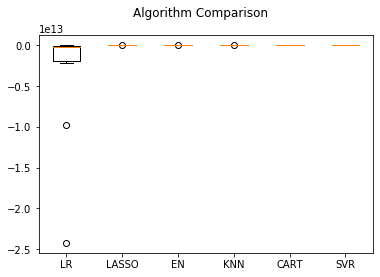

In [10]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

ScaledLR: -1.9644349973972044e+16 (2.4105454216705896e+16)
ScaledLASSO: -27.970569093027308 (10.44034328449874)
ScaledEN: -26.747388573827443 (9.012588039149975)
ScaledKNN: -25.821020592000004 (10.679948943456504)
ScaledCART: -36.7529268 (14.796577993584439)
ScaledSVR: -27.726915857343784 (10.425271267176521)


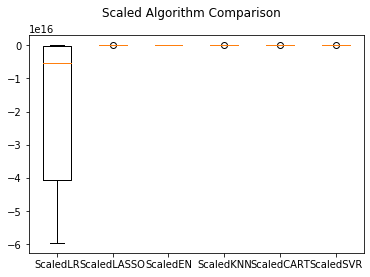

In [11]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [13]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 1, 10, 100, 1000]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print(f'Best:  ({grid_result.best_score_}, {grid_result.best_params_})')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' :  ({mean}, {stdev}, {param})')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Best:  (-14.994317828426961, {'C': 10, 'kernel': 'linear'})
 :  (-23.379362290085467, 8.837067541968375, {'C': 0.1, 'kernel': 'linear'})
 :  (-30.397184176013184, 9.817341941896528, {'C': 0.1, 'kernel': 'poly'})
 :  (-29.50072034961626, 10.611869863103506, {'C': 0.1, 'kernel': 'rbf'})
 :  (-29.536170520401697, 10.612749671870871, {'C': 0.1, 'kernel': 'sigmoid'})
 :  (-15.695265280722662, 7.112227468750858, {'C': 1, 'kernel': 'linear'})
 :  (-30.231926520811328, 10.378658962569887, {'C': 1, 'kernel': 'poly'})
 :  (-27.68775406587992, 10.407852225075109, {'C': 1, 'kernel': 'rbf'})
 :  (-55.173132822265245, 19.316928903596843, {'C': 1, 'kernel': 'sigmoid'})
 :  (-14.994317828426961, 5.781221709794222, {'C': 10, 'kernel': 'linear'})
 :  (-25.96663599976723, 12.147815578065597, {'C': 10, 'kernel': 'poly'})
 :  (-25.582415671371116, 11.187320425915166, {'C': 10, 'kernel': 'rbf'})
 :  (-5263.064431037329, 2229.0376576153976, {'C': 10, 'kernel': 'sigmoid'})
 :  (-21.85737775005246, 8.594547802

In [24]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVR(C=10.0, kernel='linear', gamma=0.2)
#model = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
#kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model.fit(rescaledX, Y_train)
# transform the validation dataset
import math
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_error(Y_validation, predictions))
mse =mean_squared_error(Y_validation, predictions)
print(f'Mean Squared Error: {mse}') 
rmse = math.sqrt(mse)
print(f'Root mean Squared Error: {rmse}')

Mean Squared Error: 16.294444582607927
Root mean Squared Error: 4.03663778194278


In [1]:
score_val = model.score(rescaledX, Y_train)
print(score_val)
score_val2 = model.score(rescaledValidationX, Y_validation)
print(score_val2)

NameError: name 'model' is not defined